# Exercise 1

## Import packages

In [6]:
import skimage.io
import skimage.color
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Implementation of some basic vector and matrix calculations using NumPy.

Reference: https://numpy.org/doc/1.18/reference/index.html

Create the following vectors and matrix using numpy. They should use floating point as data type.
$$
a = \begin{bmatrix}
1 & 0 & 1 & 0 & 1
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
1 & 2 & 3 & 4 & 5
\end{bmatrix}
$$

$$
M =\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$$

Also define the following scalar value
$$k = 5.0$$

In [7]:
# TODO: Create vectors, matrix and scalar value
a = np.array([1, 0, 1, 0, 1], dtype=np.float64)
b = np.array([1, 2, 3, 4, 5], dtype=np.float64)
M = np.matrix([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype=np.float64)
k = 5.0

print(f'a = {a}')
print(f'b = {b}')
print(f'M = {M}')
print(f'k = {k}')

a = [1. 0. 1. 0. 1.]
b = [1. 2. 3. 4. 5.]
M = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
k = 5.0


In [8]:
# TODO: Add vector a with vector b
add = np.add(a, b)
np.testing.assert_allclose(add, np.array([2, 2, 4, 4, 6]))
print(f'a + b = {add}')

# TODO: Multiply vector a with scalar value k
mult = np.multiply(k, a)
np.testing.assert_allclose(mult, np.array([5, 0, 5, 0, 5]))
print(f'k * a = {mult}')

# TODO: Dot product between a and b
dot = np.dot(a, b)
np.testing.assert_allclose(dot, 9.0)
print(f'<a, b> = {dot}')

# TODO: Create vector c by slicing vector a in order to get [0, 1, 0]
c = a[1:4]
np.testing.assert_allclose(c, [0, 1, 0])
print(f'c = {c}')

# TODO: Multiply vector c with matrix M
cM_mult = np.multiply(c,M)
np.testing.assert_allclose(cM_mult, [[0, 2, 0], [0, 5, 0], [0, 8, 0]])
print(f'c * M = {cM_mult}')

# TODO: Dot product between vector and matrix M
cM_dot = np.array(np.dot(c, M))[0]
np.testing.assert_allclose(cM_dot, [4, 5, 6])
print(f'<c, M> = {cM_dot}')

# TODO: Use a numpy-helper function to create a vector d = [0, 1, 2 ..., 99]
d = np.arange(100)

# TODO: Now use slicing with strides to reduce this vector to d_small = [40, 50, 60]
d_small = d[40:61:10]
np.testing.assert_allclose(d_small, [40, 50, 60])
print(f'd_small = {d_small}')

a + b = [2. 2. 4. 4. 6.]
k * a = [5. 0. 5. 0. 5.]
<a, b> = 9.0
c = [0. 1. 0.]
c * M = [[0. 2. 0.]
 [0. 5. 0.]
 [0. 8. 0.]]
<c, M> = [4. 5. 6.]
d_small = [40 50 60]


## Task 2

1. Load the image in ```./data/pepo.jpg``` from your disk and store it in a variable named ```image``` (use ```skimage.io```).
2. Store and print the shape of the image and the value range (min and max values).
3. Convert it to gray scale and save it in a variable named ```image_gray``` (use ```skimage.color```).
4. Store and print the shape of the grayscale image and the value range (min and max values).
5. Save the grayscale image back to disk in ```./data/pepo_gray.jpg``` (use ```skimage.io```).
6. Use Matplotlib to show the RGB and the grayscale image side by side.

Reference: https://scikit-image.org/docs/stable/index.html  
Reference: https://matplotlib.org/users/index.html  

In [9]:
# TODO: 1. Load the image in ./data/pepo.jpg from your disk and store it in a variable named image
image_path = "./data/pepo.jpg"
image = skimage.io.imread(image_path)

# TODO: 2. Store and print the shape of the image and the value range (min and max values)

rgb_image_shape = image.shape
rgb_min = image.min()
rgb_max = image.max()

print(f'RGB image shape: {rgb_image_shape}')
print(f'RGB image min: {rgb_min}')
print(f'RGB image max: {rgb_max}')

# TODO: 3. Convert it to gray scale and save it in a variable named image_gray
image_gray = skimage.color.rgb2gray(image)

# TODO: 4. Store and print the shape of the grayscale image and the value range (min and max values)

grayscale_image_shape = image_gray.shape
grayscale_min = image_gray.min()
grayscale_max = image_gray.max()

print(f'Grayscale image shape: {grayscale_image_shape}')
print(f'Grayscale image min: {grayscale_min}')
print(f'Grayscale image max: {grayscale_max}')

# TODO: 5. Save the grayscale image back to disk in ./data/pepo_gray.jpg
image_gray = skimage.img_as_ubyte(image_gray)
skimage.io.imsave("pepo_gray.jpg", image_gray)

RGB image shape: (512, 512, 3)
RGB image min: 0
RGB image max: 255
Grayscale image shape: (512, 512)
Grayscale image min: 0.0008333333333333333
Grayscale image max: 1.0


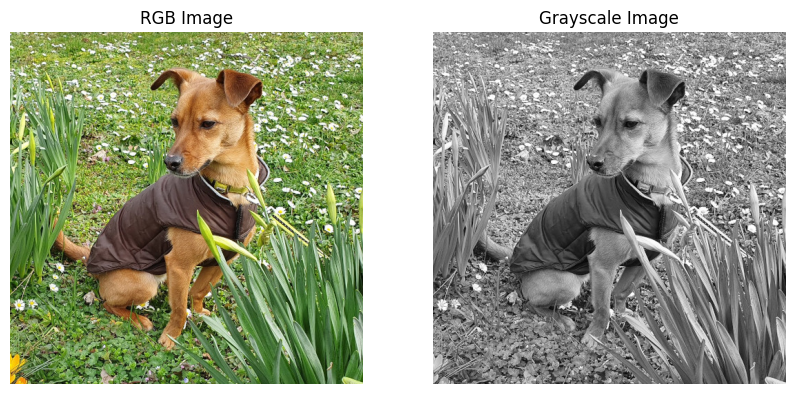

In [10]:
# TODO: 6. Use Matplotlib to show the RGB and the grayscale image side by side.
# Make sure that the gray image is displayed in gray.

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('RGB Image')

axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Grayscale Image')

for ax in axes:
    ax.axis('off')

plt.show()

## Task 3

Plot the color histogram of the rgb image.

Reference: https://matplotlib.org/users/index.html

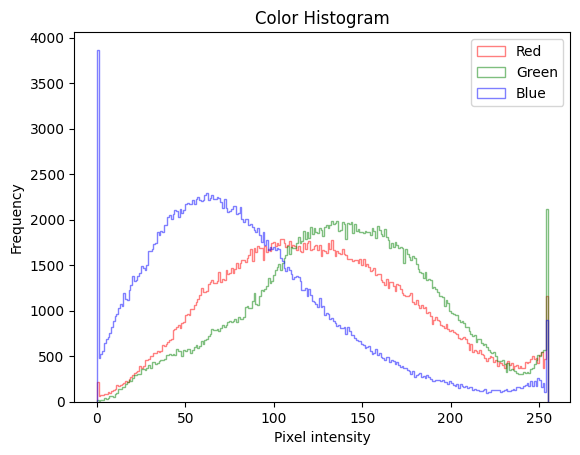

In [11]:
def plot_color_histogram(image):
    '''
    Plot the histogram of each color channel into a single plot.
    Take a look at the scikit-image submodule skimage.exposure

    image -- RGB image
    '''
    red_channel = image[:, :, 0].flatten()
    green_channel = image[:, :, 1].flatten()
    blue_channel = image[:, :, 2].flatten()

    plt.hist(red_channel, bins=256, color='red', alpha=0.5, label='Red', histtype='step')
    plt.hist(green_channel, bins=256, color='green', alpha=0.5, label='Green', histtype='step')
    plt.hist(blue_channel, bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')

    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')
    plt.title('Color Histogram')
    plt.legend()

    plt.show()

plot_color_histogram(image)

## Task 4

Convert the RGB image into the HSV color space. Rotate the colors in the HSV color space, convert it back to the RGB color space and plot it together with its histogram. For this task, you are only allowed to use NumPy.

More information about the HSV color space: https://en.wikipedia.org/wiki/HSL_and_HSV

In [12]:
def rgb2hsv(image):
    '''
    Convert the rgb image into hsv color space and return it.

    image -- rgb image
    '''

    r = image[:, :, 0] / 255.0
    g = image[:, :, 1] / 255.0
    b = image[:, :, 2] / 255.0

    max_val = np.maximum(r, g)
    max_val = np.maximum(max_val, b)

    min_val = np.minimum(r, g)
    min_val = np.minimum(min_val, b)

    v = max_val

    delta = max_val - min_val
    s = np.where(max_val != 0, delta / max_val, 0)

    h = np.zeros_like(v)
    non_zero_delta = delta != 0
    h[non_zero_delta & (max_val == r)] = 60 * (((g - b) / delta)[non_zero_delta & (max_val == r)] % 6)
    h[non_zero_delta & (max_val == g)] = 60 * (((b - r) / delta) + 2)[non_zero_delta & (max_val == g)]
    h[non_zero_delta & (max_val == b)] = 60 * (((r - g) / delta) + 4)[non_zero_delta & (max_val == b)]

    # Create HSV image
    hsv = np.stack((h, s, v), axis=-1)

    return hsv


def hsv2rgb(image):
    '''
    Convert the hsv image into rgb color space and return it.

    image -- hsv image
    '''
    h = image[:, :, 0]
    s = image[:, :, 1]
    v = image[:, :, 2]

    c = v * s
    h_prime = h / 60.0
    x = c * (1 - np.abs((h_prime % 2) - 1))

    r, g, b = np.zeros_like(h), np.zeros_like(h), np.zeros_like(h)

    mask = (0 <= h_prime) & (h_prime < 1)
    r[mask] = c[mask]
    g[mask] = x[mask]

    mask = (1 <= h_prime) & (h_prime < 2)
    r[mask] = x[mask]
    g[mask] = c[mask]

    mask = (2 <= h_prime) & (h_prime < 3)
    g[mask] = c[mask]
    b[mask] = x[mask]

    mask = (3 <= h_prime) & (h_prime < 4)
    g[mask] = x[mask]
    b[mask] = c[mask]

    mask = (4 <= h_prime) & (h_prime < 5)
    r[mask] = x[mask]
    b[mask] = c[mask]

    mask = (5 <= h_prime) & (h_prime < 6)
    r[mask] = c[mask]
    b[mask] = x[mask]

    m = v - c

    rgb = np.stack((r + m, g + m, b + m), axis=-1) * 255

    return rgb.astype(np.uint8)


C:\Users\hamma\AppData\Roaming\ipykernel_15928\662614688.py:25: RuntimeWarning: invalid value encountered in divide
  h[non_zero_delta & (max_val == r)] = 60 * (((g - b) / delta)[non_zero_delta & (max_val == r)] % 6)
C:\Users\hamma\AppData\Roaming\ipykernel_15928\662614688.py:26: RuntimeWarning: invalid value encountered in divide
  h[non_zero_delta & (max_val == g)] = 60 * (((b - r) / delta) + 2)[non_zero_delta & (max_val == g)]
C:\Users\hamma\AppData\Roaming\ipykernel_15928\662614688.py:27: RuntimeWarning: invalid value encountered in divide
  h[non_zero_delta & (max_val == b)] = 60 * (((r - g) / delta) + 4)[non_zero_delta & (max_val == b)]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


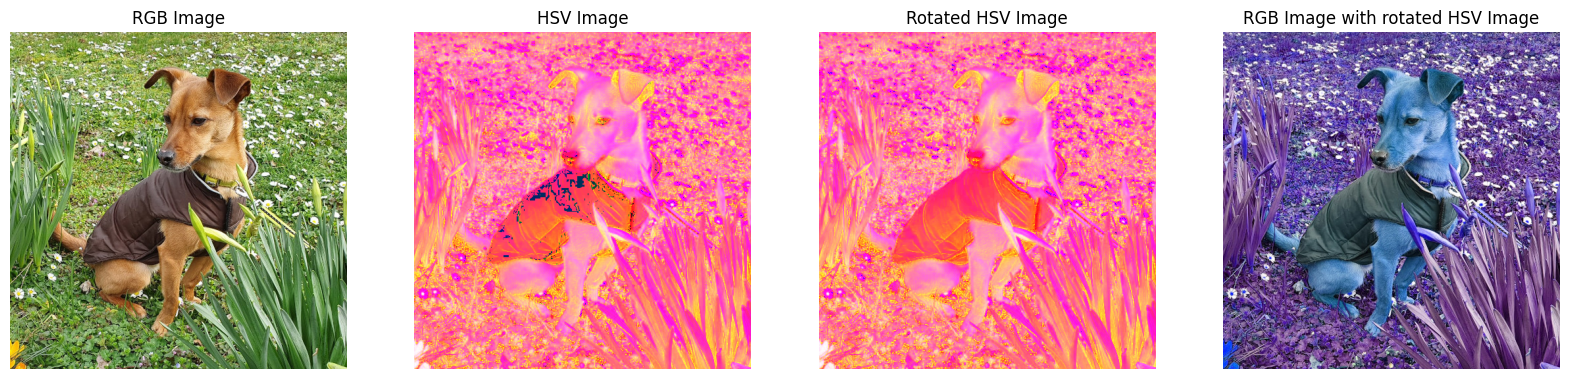

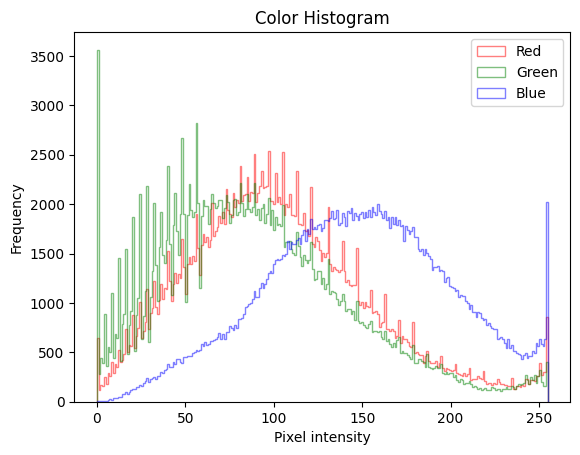

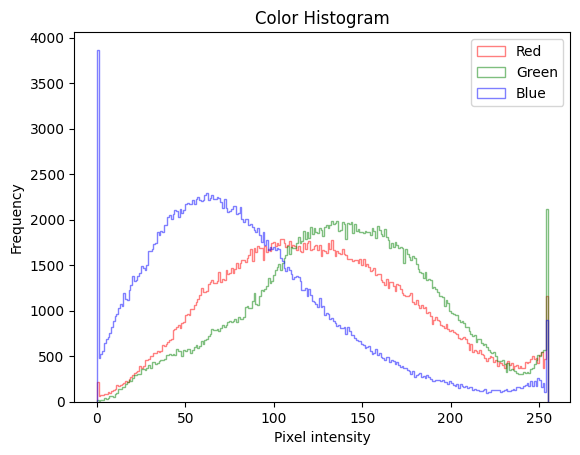

In [13]:
# Change the color space from rgb to hsv and plot it
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
image_hsv = rgb2hsv(image)

# TODO: plot image
axes[0].imshow(image)
axes[0].set_title('RGB Image')
axes[1].imshow(image_hsv)
axes[1].set_title('HSV Image')

# TODO: Rotate the colors in hsv color space
image_hsv[:, :, 0] = (image_hsv[:, :, 0] + 180) % 360
axes[2].imshow(image_hsv)
axes[2].set_title('Rotated HSV Image')


# TODO: Now, convert it back from HSV to RGB and plot it
image_rotated_rgb = hsv2rgb(image_hsv)

axes[3].imshow(image_rotated_rgb, cmap='gray')
axes[3].set_title('RGB Image with rotated HSV Image')

for ax in axes:
    ax.axis('off')

plt.show()

# TODO: Plot the color histogram of the inverted rgb image
plot_color_histogram(image_rotated_rgb)
plot_color_histogram(image)
